In [1]:
#importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#setting up data
Dfull = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_full = Dfull.drop('y', axis=1)
y_full = Dfull['y']
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# Logistic Regression

In [8]:
lr = LogisticRegression(max_iter=10000)  # LogisticRefression
lr.fit(X_full, y_full)

y_pred_prob_full = lr.predict_proba(X_test)[:, 1]
auroc_full = roc_auc_score(y_test, y_pred_prob_full)
print(f"AUROC using Dfull: {auroc_full}")

sizes = [20, 100, 500, 5000] # importing trainsize files
auroc_values = [auroc_full]

for size in sizes:
    train_data = pd.read_csv(f'train{size}.csv')
    
    X_train = train_data.drop('y', axis=1)
    y_train = train_data['y']
    
    lr.fit(X_train, y_train)
    
    y_pred_prob = lr.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_pred_prob)
    auroc_values.append(auroc)
    print(f"AUROC using train{size}.csv: {auroc}")

AUROC using Dfull: 0.8943435970242734
AUROC using train20.csv: 0.849245234406919
AUROC using train100.csv: 0.6247225483189042
AUROC using train500.csv: 0.8524932651602618
AUROC using train5000.csv: 0.8942454985182813


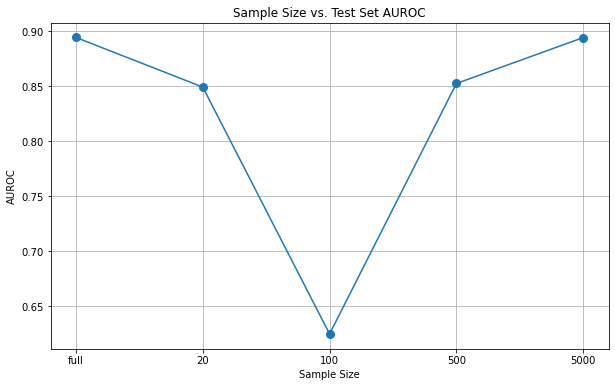

In [9]:
#Auroc plots
plt.figure(figsize=(10, 6))
plt.plot(['full'] + sizes, auroc_values, '-o', markersize=8)
plt.xlabel('Sample Size')
plt.ylabel('AUROC')
plt.title('Sample Size vs. Test Set AUROC - Logistic Regression')
plt.grid(True)
plt.show()

# Random Forest

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_full, y_full)

y_pred_prob_full_rf = rf.predict_proba(X_test)[:, 1]
auroc_full_rf = roc_auc_score(y_test, y_pred_prob_full_rf)
print(f"AUROC using Dfull (Random Forest): {auroc_full_rf}")


sizes = [20, 100, 500, 5000] # importing trainsize files
auroc_values_rf = [auroc_full_rf]  

for size in sizes:
    train_data = pd.read_csv(f'train{size}.csv')
    
    X_train = train_data.drop('y', axis=1)
    y_train = train_data['y']
    
    rf.fit(X_train, y_train)
    
    y_pred_prob = rf.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_pred_prob)
    auroc_values_rf.append(auroc)
    print(f"AUROC using train{size}.csv (Random Forest): {auroc}")

AUROC using Dfull (Random Forest): 0.9851251402754736
AUROC using train20.csv (Random Forest): 0.7640321288777208
AUROC using train100.csv (Random Forest): 0.8877133238253243
AUROC using train500.csv (Random Forest): 0.9496884024927801
AUROC using train5000.csv (Random Forest): 0.9840670778179873


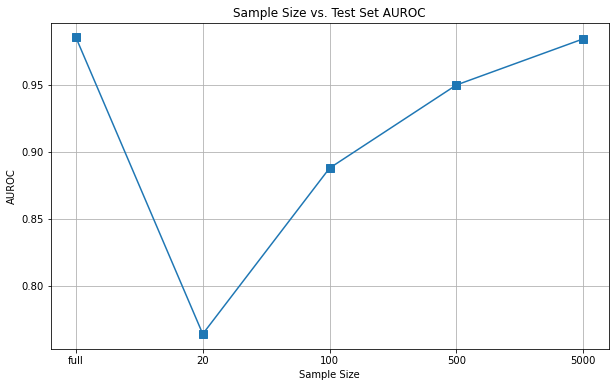

In [10]:
#Auroc plots
plt.figure(figsize=(10, 6))
plt.plot(['full'] + sizes, auroc_values_rf, '-s', markersize=8)
plt.xlabel('Sample Size')
plt.ylabel('AUROC')
plt.title('Sample Size vs. Test Set AUROC - Random Forest')
plt.grid(True)
plt.show()

# Comparison Plots - Parametric vs Non Parametric

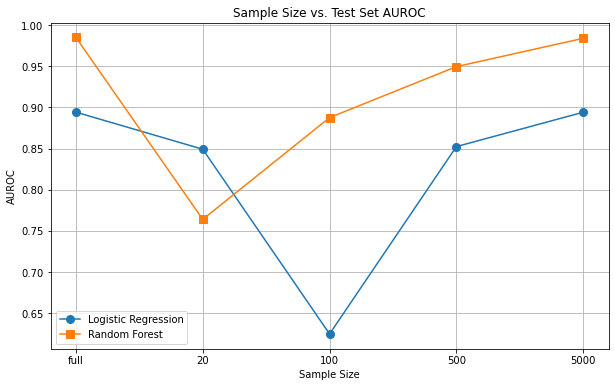

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(['full'] + sizes, auroc_values, '-o', markersize=8, label="Logistic Regression")
plt.plot(['full'] + sizes, auroc_values_rf, '-s', markersize=8, label="Random Forest")
plt.xlabel('Sample Size')
plt.ylabel('AUROC')
plt.title('Sample Size vs. Test Set AUROC')
plt.legend()
plt.grid(True)
plt.show()